In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng

# Zadanie 
Pewna grupa poddała się trzem testom.
Na podstawie poniższych wyników chcielibyśmy zweryfikować hipotezę zerowa mówiącą, że środni wynik w tych trzech testach jest taki sam.

In [2]:
data = np.rec.array([
    (  1,   'mental',  2 ),
    (  2,   'mental',  2 ),
    (  3,   'mental',  3 ),
    (  4,   'mental',  4 ),
    (  5,   'mental',  4 ),
    (  6,   'mental',  5 ),
    (  7,   'mental',  3 ),
    (  8,   'mental',  4 ),
    (  9,   'mental',  4 ),
    ( 10,   'mental',  4 ),
    ( 11, 'physical',  4 ),
    ( 12, 'physical',  4 ),
    ( 13, 'physical',  3 ),
    ( 14, 'physical',  5 ),
    ( 15, 'physical',  4 ),
    ( 16, 'physical',  1 ),
    ( 17, 'physical',  1 ),
    ( 18, 'physical',  2 ),
    ( 19, 'physical',  3 ),
    ( 20, 'physical',  3 ),
    ( 21,  'medical',  1 ),
    ( 22,  'medical',  2 ),
    ( 23,  'medical',  2 ),
    ( 24,  'medical',  2 ),
    ( 25,  'medical',  3 ),
    ( 26,  'medical',  2 ),
    ( 27,  'medical',  3 ),
    ( 28,  'medical',  1 ),
    ( 29,  'medical',  3 ),
    ( 30,  'medical',  1 )], dtype=[('idx', '<i4'),
                                    ('Treatment', '|S8'),
                                    ('StressReduction', '<i4')])

# Wykonujemy test ANOVA

In [3]:
df = pd.DataFrame(data)
d1=df["StressReduction"][df["Treatment"]==b'mental']
d2=df["StressReduction"][df["Treatment"]==b'physical']
d3=df["StressReduction"][df["Treatment"]==b'medical']

In [16]:
# test Levene
(W,p) = stats.levene(d1, d2, d3)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))
else:
    print('test przeszedl, p-value=', p)


test przeszedl, p-value= 0.4567120561411028


In [9]:
# analiza ANOVA
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# Elegant alternative implementation, with pandas & statsmodels
df = pd.DataFrame(data, columns=['StressReduction', 'Treatment'])    
model = ols('StressReduction ~ C(Treatment)', df).fit()  # anove 2-czynnikowa C(tratement, 2)
anovaResults = anova_lm(model)
print(anovaResults)

# wyszlo 0.012617 - test nie przeszedl?


                df     sum_sq   mean_sq         F    PR(>F)
C(Treatment)   2.0  11.666667  5.833333  5.163934  0.012617
Residual      27.0  30.500000  1.129630       NaN       NaN


## Wniosek

...

# Wykonujemy analizę post hoc

In [11]:
#Then, do the multiple testing
multiComp = MultiComparison(data['StressReduction'], data['Treatment'])
# BADANIE PRÓBKI KAŻDA VS KAŻDA

In [12]:
multiComp.tukeyhsd().summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [ ]:
# medical i physical są takie same, medical i mental nie są, zatem mamy kolejność 1, 2, 3, 
# w poprz zadaniu miejsca na podium 1,2,2

3.5 3.0 2.0


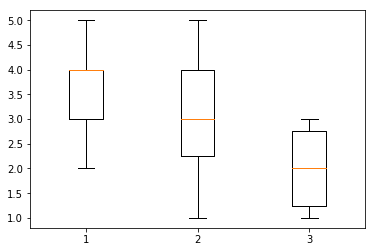

In [15]:
plt.boxplot([d1, d2, d3])
# kolejność wynika z obliczenia średnich: 1,2,3
print(np.mean(d1), np.mean(d2), np.mean(d3))
plt.show()